In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [11]:
celebrities = ['C:\\Users\\Capucine\\Computer_Vision\\opencv_frame_0.png','C:\\Users\\Capucine\\Computer_Vision\\KimKo.jpg','C:\\Users\\Capucine\\Computer_Vision\\Beyonce.jpg','C:\\Users\\Capucine\\Computer_Vision\\Drake.jpg','C:\\Users\\Capucine\\Computer_Vision\\Ellen.jpg','C:\\Users\\Capucine\\Computer_Vision\\lionel-messi.jpg','C:\\Users\\Capucine\\Computer_Vision\\Justin.jpg']

In [12]:
results = []
for i in range(len(celebrities)):
    results.append([celebrities[i],i])
print(results)

[['C:\\Users\\Capucine\\Computer_Vision\\opencv_frame_0.png', 0], ['C:\\Users\\Capucine\\Computer_Vision\\KimKo.jpg', 1], ['C:\\Users\\Capucine\\Computer_Vision\\Beyonce.jpg', 2], ['C:\\Users\\Capucine\\Computer_Vision\\Drake.jpg', 3], ['C:\\Users\\Capucine\\Computer_Vision\\Ellen.jpg', 4], ['C:\\Users\\Capucine\\Computer_Vision\\lionel-messi.jpg', 5], ['C:\\Users\\Capucine\\Computer_Vision\\Justin.jpg', 6]]


In [13]:
cam = cv.VideoCapture(0)
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output_final.avi', fourcc, 20.0, (640, 480))
score = []

cv.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv.imshow("test", frame)

    k = cv.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv.destroyAllWindows()

Escape hit, closing...


In [14]:
path = 'C:\\Users\\Capucine\\Computer_Vision\\'
# Load two images
for i in range(len(celebrities)):
    imag2 = cv.imread(celebrities[i])
    imag1 = cv.imread('C:\\Users\\Capucine\\Computer_Vision\\WhiteSheet.jpg')
    # put logo on top-left corner of image 1
    rows, cols, channels = imag2.shape
    roi = imag1[0:rows, 0:cols]
    # Now create a mask of logo and create its inverse mask also
    imag2gray = cv.cvtColor(imag2,cv.COLOR_BGR2GRAY)
    #cv.imshow('res1',img2gray)
    ret, mask = cv.threshold(imag2gray, 90, 255, cv.THRESH_BINARY)
    mask_inv = cv.bitwise_not(mask)
    #cv.imshow('res2',mask_inv)
    imag1_bg = cv.bitwise_and(roi,roi,mask = mask)
    #cv.imshow('res3',img1_bg)
    # Take only region of emblem from emblem image.
    imag2_fg = cv.bitwise_and(imag2,imag2,mask = mask)
    #cv.imshow('res4',img2_fg)
    # Put emblem in ROI and modify the main image
    dst = cv.add(imag1_bg,imag2_fg)
    imag1[0:rows, 0:cols ] = dst
    #cv.imshow('res5',dst)
    cv.imshow('result',imag1)
    cv.imwrite(path + str(i) + '.jpg', imag1)
    cv.waitKey(0)
    cv.destroyAllWindows()

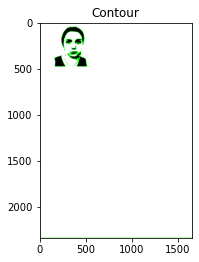

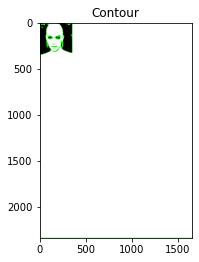

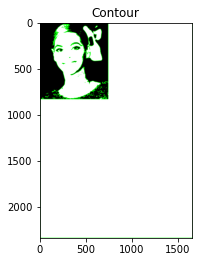

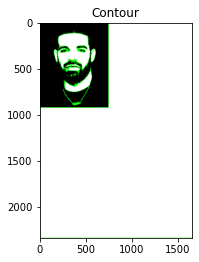

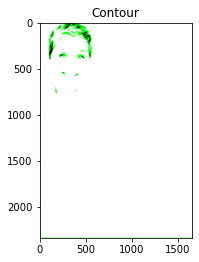

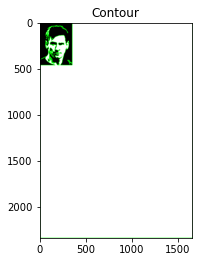

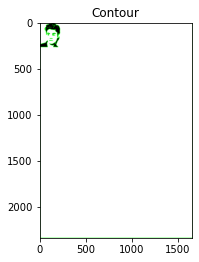

In [15]:
detourages = []
for i in range(len(celebrities)):
    im1 = cv.imread(path + str(i) + '.jpg')
    imgray1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
    ret1,thresh1 = cv.threshold(imgray1, 90, 255, 0)
    contours1,hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #plt.subplot(121),plt.imshow(thresh1)
    #plt.subplot(121),plt.imshow(thresh2)
    #plt.title("Original1")
    #plt.title("Original2")
    cv.drawContours(im1, contours1, -1, (0,255,0), 3)
    detourages.append(contours1[0])
    plt.subplot(121),plt.imshow(im1)
    plt.title('Contour')
    plt.show()



In [16]:
contours_totaux = []
for i in range(len(celebrities)):
    contours_totaux.append(cv.matchShapes(detourages[0],detourages[i],1,0.0))
print(contours_totaux)
contours_totaux[0] = 10000
print(contours_totaux)

[0.0, 0.3077926611898467, 0.610715409989678, 0.31940590397748236, 0.0, 1.7976931348623157e+308, 0.00022149355973205553]
[10000, 0.3077926611898467, 0.610715409989678, 0.31940590397748236, 0.0, 1.7976931348623157e+308, 0.00022149355973205553]


In [17]:
min = 10000 
for i in range(len(contours_totaux)):
    if contours_totaux[i] < min:
        min = contours_totaux[i]
print(min)
name_path = celebrities[contours_totaux.index(min)]
#print(name_path)
#characters = "C:\\Users\\Capucine\\Computer_Vision\\"
#name_path = name_path - characters
almost_name = name_path[34:]
name = almost_name[0:-4]
print('You look like ' + name + ' !!')

0.0
You look like Ellen !!
